In [1]:
#About Dataset
# ID - ID of the patient
# A1_Score to A10_Score - Score based on Autism Spectrum Quotient (AQ) 10 item screening tool
# age - Age of the patient in years
# gender - Gender of the patient
# ethnicity - Ethnicity of the patient
# jaundice - Whether the patient had jaundice at the time of birth
# autism - Whether an immediate family member has been diagnosed with autism
# # contry_of_res - Country of residence of the patient
# used_app_before - Whether the patient has undergone a screening test before
# result - Score for AQ1-10 screening test
# age_desc - Age of the patient
# relation - Relation of patient who completed the test
# Class/ASD - Classified result as 0 or 1. Here 0 represents No and 1 represents Yes. This is the target column, and during submission submit the values as 0 or 1 only.

In [2]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import linear_model
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix

In [3]:
#creating dataframe
df = pd.read_csv(r"C:\Users\Akanksha\Downloads\Autism_Prediction\train.csv")
df.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,...,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,...,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,...,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,...,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0


In [4]:
df.shape

(800, 22)

In [5]:
df.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,...,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,...,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,...,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,...,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0


In [6]:
df.tail()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
795,796,0,1,0,0,0,0,0,0,1,...,m,Hispanic,no,no,New Zealand,no,12.999501,18 and more,Self,0
796,797,0,1,1,0,0,1,0,1,1,...,m,White-European,no,no,Cyprus,no,13.561518,18 and more,Self,0
797,798,0,0,0,0,0,0,0,0,0,...,m,South Asian,yes,no,New Zealand,no,2.653177,18 and more,Self,0
798,799,0,0,0,0,0,0,0,0,0,...,f,?,no,no,Canada,no,9.069342,18 and more,Self,0
799,800,0,1,0,0,0,0,0,0,0,...,f,?,no,no,United Arab Emirates,yes,2.243304,18 and more,Self,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  austim           800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

In [8]:
df.isnull().head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [9]:
df.isnull().sum()

ID                 0
A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                0
gender             0
ethnicity          0
jaundice           0
austim             0
contry_of_res      0
used_app_before    0
result             0
age_desc           0
relation           0
Class/ASD          0
dtype: int64

In [10]:
df.duplicated().any()

False

In [11]:
print(df.dtypes)

ID                   int64
A1_Score             int64
A2_Score             int64
A3_Score             int64
A4_Score             int64
A5_Score             int64
A6_Score             int64
A7_Score             int64
A8_Score             int64
A9_Score             int64
A10_Score            int64
age                float64
gender              object
ethnicity           object
jaundice            object
austim              object
contry_of_res       object
used_app_before     object
result             float64
age_desc            object
relation            object
Class/ASD            int64
dtype: object


In [12]:
df.drop(['ethnicity','jaundice','contry_of_res','used_app_before','relation','age_desc'], axis=1 ,inplace=True)

In [13]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
df['gender']= label_encoder.fit_transform(df['gender'])

df['gender'].unique()


array([0, 1])

In [14]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
df['austim']= label_encoder.fit_transform(df['austim'])

df['austim'].unique()


array([0, 1])

<AxesSubplot:title={'center':'autism cases over age'}, xlabel='age'>

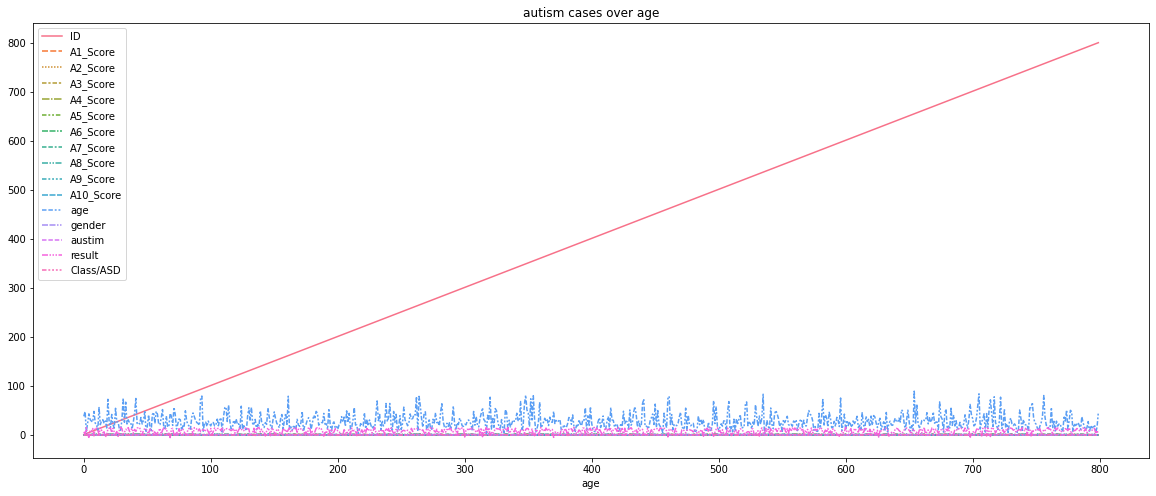

In [15]:
#visualizing how autism evolved with age
import seaborn as sns
plt.figure(figsize=(20,8))
plt.xlabel("age")
plt.title("autism cases over age")
sns.lineplot(data=df)

In [16]:
df.groupby("austim").count()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,result,Class/ASD
austim,,,,,,,,,,,,,,,
0,669,669,669,669,669,669,669,669,669,669,669,669,669,669,669
1,131,131,131,131,131,131,131,131,131,131,131,131,131,131,131


In [17]:
df['austim'].value_counts()

0    669
1    131
Name: austim, dtype: int64

In [18]:
age = df[["age"]]
austim = df[["austim"]]

In [19]:
df.corr()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,austim,result,Class/ASD
ID,1.000000,0.011079,-0.001627,0.004113,-0.002010,-0.004362,0.009622,0.026733,-0.043303,0.047655,-0.045362,-0.039434,-0.013793,0.012586,0.026382,0.047149
A1_Score,0.011079,1.000000,0.401419,0.493016,0.383718,0.432912,0.371917,0.447262,0.191815,0.439397,0.390478,0.055083,-0.094794,0.262947,0.307919,0.300474
A2_Score,-0.001627,0.401419,1.000000,0.489330,0.488173,0.427895,0.447721,0.452713,0.302040,0.511547,0.454422,0.083590,-0.047139,0.315189,0.339144,0.372740
A3_Score,0.004113,0.493016,0.489330,1.000000,0.558896,0.579769,0.511669,0.559118,0.315882,0.597022,0.510276,0.109924,-0.061107,0.366994,0.428870,0.460927
A4_Score,-0.002010,0.383718,0.488173,0.558896,1.000000,0.559748,0.563543,0.554838,0.360781,0.576723,0.506292,0.102938,-0.005097,0.395126,0.418214,0.501046
A5_Score,-0.004362,0.432912,0.427895,0.579769,0.559748,1.000000,0.494944,0.550663,0.292747,0.524624,0.436010,0.096364,-0.045153,0.395629,0.369226,0.461773
A6_Score,0.009622,0.371917,0.447721,0.511669,0.563543,0.494944,1.000000,0.496588,0.333694,0.536666,0.419172,0.058777,-0.028670,0.390835,0.411550,0.543010
A7_Score,0.026733,0.447262,0.452713,0.559118,0.554838,0.550663,0.496588,1.000000,0.271903,0.539433,0.455326,0.102883,-0.063065,0.392940,0.401655,0.452338
A8_Score,-0.043303,0.191815,0.302040,0.315882,0.360781,0.292747,0.333694,0.271903,1.000000,0.352747,0.250438,0.015488,-0.035098,0.211854,0.277795,0.312388
A9_Score,0.047655,0.439397,0.511547,0.597022,0.576723,0.524624,0.536666,0.539433,0.352747,1.000000,0.485983,0.125844,-0.044149,0.359126,0.377139,0.463347


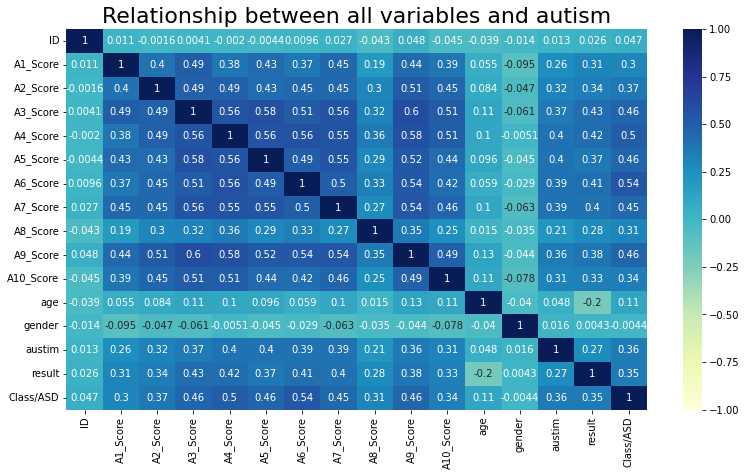

In [20]:
plt.figure(figsize=(13,7))
sns.heatmap(df.corr() , vmin=-1 , vmax=1 , cmap='YlGnBu' , annot=True)
plt.title("Relationship between all variables and autism", fontsize=22)
plt.show()

# LOGISTIC REGRESSION


In [21]:
from sklearn.model_selection import train_test_split
x = df.drop('Class/ASD',axis=1)
y = df['Class/ASD']
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = 0.30 , random_state=101)

In [22]:
from sklearn.linear_model import LogisticRegression
regression = LogisticRegression()
regression.fit(x_train , y_train)

C:\MinGW\python 37\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [23]:
prediction = regression.predict(x_test)

In [24]:
accuracy_score(y_test , prediction)

0.8916666666666667

In [25]:
print(confusion_matrix(y_test,prediction))

[[179  10]
 [ 16  35]]


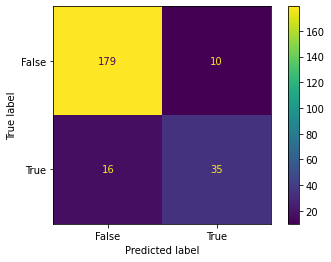

In [26]:
from sklearn import metrics

actual = y_test
predicted = prediction

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [27]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93       189
           1       0.78      0.69      0.73        51

    accuracy                           0.89       240
   macro avg       0.85      0.82      0.83       240
weighted avg       0.89      0.89      0.89       240



# KNN ALGORITHM

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.drop('Class/ASD',axis=1))

StandardScaler()

In [29]:
scaled_features = scaler.transform(df.drop('Class/ASD',axis=1))

In [30]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,austim,result
0,-1.729887,0.886405,-1.061913,1.105542,-0.842260,1.237597,-0.660504,1.231147,-1.017656,1.010051,0.787041,0.596329,-1.401058,-0.442509,-0.455003
1,-1.725557,-1.128152,-1.061913,-0.904534,-0.842260,-0.808018,-0.660504,-0.812251,-1.017656,-0.990050,-1.270582,1.183895,0.713746,-0.442509,-1.307503
2,-1.721227,0.886405,0.941697,1.105542,1.187282,1.237597,1.513995,1.231147,0.982650,1.010051,0.787041,-1.292684,0.713746,2.259839,1.314176
3,-1.716897,-1.128152,-1.061913,-0.904534,-0.842260,-0.808018,-0.660504,-0.812251,-1.017656,-0.990050,-1.270582,-0.299998,-1.401058,-0.442509,-1.303042
4,-1.712567,-1.128152,-1.061913,-0.904534,-0.842260,-0.808018,-0.660504,-0.812251,-1.017656,-0.990050,-1.270582,0.905091,0.713746,-0.442509,-2.771177


In [31]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['Class/ASD'],
                                                    test_size=0.30)

In [32]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [33]:
pred = knn.predict(X_test)
accuracy_score(y_test , pred)

0.8166666666666667

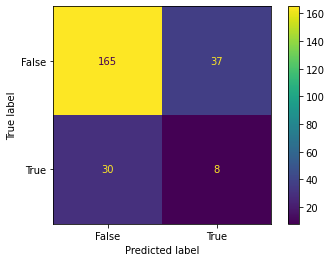

In [34]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

actual = y_test
predicted = prediction

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [35]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.92      0.86      0.89       202
           1       0.44      0.61      0.51        38

    accuracy                           0.82       240
   macro avg       0.68      0.73      0.70       240
weighted avg       0.84      0.82      0.83       240



In [36]:
# Choosing k value
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

In [37]:
# K=1
import matplotlib.pyplot as plt
import numpy
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix[y_test,pred])
print('\n')
print(classification_report(y_test,pred))

WITH K=1


[165 165  30  30  37 165 165 165 165 165 165 165 165 165   8  37 165 165
 165 165 165 165 165 165 165 165 165   8 165 165 165   8 165 165 165  37
  37 165 165 165  37 165 165 165  37   8   8 165  30  37   8 165  37 165
 165   8 165  37 165 165 165 165  30  30 165 165  37 165 165 165 165 165
  37 165 165 165 165 165 165   8 165 165  37 165 165 165 165 165   8 165
   8  37 165 165 165 165 165 165 165   8 165 165 165 165 165   8 165 165
 165 165 165 165 165 165 165  37 165 165 165 165  37 165  37 165 165 165
 165 165  37 165 165 165  30   8 165 165 165  37 165 165  37  30 165   8
   8 165 165  30 165   8  30 165   8 165 165 165 165 165   8 165  37 165
  37 165 165 165 165  30 165 165  37 165 165  37  37 165   8   8 165 165
 165 165  37 165 165 165 165  37 165 165 165 165 165 165 165  37 165 165
 165 165 165 165 165 165 165 165 165  30 165  30 165  30 165   8 165 165
 165  37 165 165 165 165  30 165 165 165 165 165  30 165 165 165 165 165
   8   8  37 165 165 165]


            

In [38]:
# NOW WITH K=15
knn = KNeighborsClassifier(n_neighbors=15)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=15')
print('\n')
print(confusion_matrix[(y_test,pred)])
print('\n')
print(classification_report(y_test,pred))

WITH K=15


[165 165   8  30  37  37 165 165 165 165 165 165 165 165   8  37 165 165
 165 165 165  37 165 165 165 165 165   8 165 165 165   8 165 165 165 165
  37 165 165 165  37 165 165 165 165   8   8 165   8  37  30 165 165 165
 165   8 165  37 165 165 165 165   8  30 165 165  37 165 165 165 165 165
  37 165 165 165 165 165 165   8 165 165  37 165 165 165 165 165   8 165
   8  37 165 165 165 165 165 165 165   8 165 165 165 165 165   8 165 165
 165 165 165 165 165 165 165  37 165 165 165 165 165 165  37 165 165 165
 165 165  37 165 165 165   8   8 165 165 165  37 165 165 165   8 165   8
   8 165 165  30  37   8   8 165   8 165 165 165 165 165   8 165  37 165
  37 165 165 165 165   8 165 165  37 165 165  37  37 165   8   8 165  37
 165 165 165 165 165 165 165 165 165 165 165 165 165 165 165  37 165 165
 165 165 165  37 165 165 165 165 165   8 165  30 165   8 165   8 165 165
 165  37 165 165 165 165   8 165 165 165 165 165  30 165  37 165 165 165
   8   8  37 165 165 165]


           

In [39]:
prediction = knn.predict(x_test)
accuracy_score(y_test , prediction)

C:\MinGW\python 37\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


0.825

# SVM

In [40]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train,y_train)

SVC()

In [41]:
predictions = model.predict(X_test)
accuracy_score(y_test , predictions)

0.8791666666666667

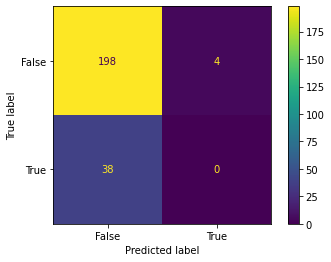

In [42]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

actual = y_test
predicted = prediction

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [43]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93       202
           1       0.60      0.74      0.66        38

    accuracy                           0.88       240
   macro avg       0.77      0.82      0.79       240
weighted avg       0.89      0.88      0.88       240



# DECISION TREE

In [44]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [45]:
predictions = dtree.predict(X_test)
accuracy_score(y_test , predictions)

0.8208333333333333

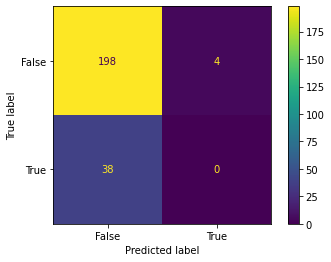

In [46]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

actual = y_test
predicted = prediction

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [47]:
predictions = dtree.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.93      0.85      0.89       202
           1       0.45      0.66      0.54        38

    accuracy                           0.82       240
   macro avg       0.69      0.75      0.71       240
weighted avg       0.85      0.82      0.83       240



# RANDOM FOREST

In [48]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [49]:
rfc_pred = rfc.predict(X_test)
accuracy_score(y_test , rfc_pred)

0.8666666666666667

In [50]:
print(confusion_matrix(y_test,rfc_pred))

[[183  19]
 [ 13  25]]


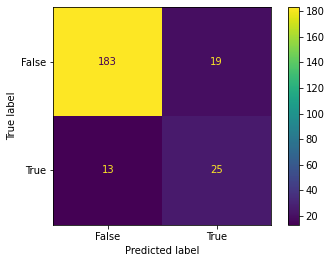

In [51]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

actual = y_test
predicted = rfc_pred

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [52]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       202
           1       0.57      0.66      0.61        38

    accuracy                           0.87       240
   macro avg       0.75      0.78      0.76       240
weighted avg       0.88      0.87      0.87       240



# ACCURACIES - 

In [53]:
# Logistic Regression -> 89.16%
# KNN -> 82.91%
# SVM -> 86.66%
# DECISION TREE -> 84.16%
# RANDOM FOREST -> 87.08%

# Therefore, best model for classification of autism is LOGISTIC REGRESSION